In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import json

In [130]:
def parse_views(text):
    match = re.search(r'([\d.,]+)\s*([KMB]?)', text, re.IGNORECASE)
    if not match:
        return None

    number, suffix = match.groups()
    number = float(number.replace(',', '.'))

    multipliers = {'K': 1000, 'M': 1000000, 'B': 1000000000}
    multiplier = multipliers.get(suffix.upper(), 1)

    return int(number * multiplier)

In [131]:
with open("danzan_girlfriends.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")

df.reset_index(inplace=True)
df.rename(columns={"index": "name"}, inplace=True)

df["views"] = df["views"].apply(parse_views).astype(int)
df["video_counts"] = df["video_counts"].str[:-6].astype(int)
df["name"] = df["name"].astype(str)

for col in ["twitter", "instagram", "onlyfans", "tiktok", "facebook"]:
    df[col + "_exists"] = df[col].notna()

df["average_views"] = df["views"]/df["video_counts"]
df["num_platforms"] = df[["twitter_exists","instagram_exists","onlyfans_exists","tiktok_exists","facebook_exists"]].sum(axis=1)

df = df[["name", "views", "video_counts", "average_views", "twitter", "twitter_exists", "instagram", "instagram_exists", "onlyfans", "onlyfans_exists", "tiktok", "tiktok_exists", "facebook", "facebook_exists", "num_platforms"]]

df["average_views"] = df["average_views"].replace([np.inf, -np.inf], np.nan)
df["average_views"] = df["average_views"].fillna(0)
df["average_views"] = df["average_views"].round().astype("Int64")

print(df)

                   name       views  video_counts  average_views  \
0            Alex Adams  3500000000           491        7128310   
1          Lana Rhoades  2000000000           409        4889976   
2          ANGELA WHITE  1700000000          1028        1653696   
3          Violet Myers   771000000           392        1966837   
4           Johnny Sins  2100000000           877        2394527   
...                 ...         ...           ...            ...   
11278         harumeiji      603000             6         100500   
11279          Janner3D     6400000            81          79012   
11280            Reebek       96700             9          10744   
11281      Hide_Fantasy     7600000            46         165217   
11282  ExtendedMarriage           0             0              0   

                                    twitter  twitter_exists  \
0                                       NaN           False   
1       https://www.twitter.com/lanarhoades            Tr

In [132]:
# df_tags = pd.read_csv("danzan_girlfriends_with_tags(9).csv")

# df = df.merge(df_tags[["names", "tags"]], left_on="name", right_on="names", how="left")

# df.drop(columns=["names"], inplace=True)

print(df.head())

           name       views  video_counts  average_views  \
0    Alex Adams  3500000000           491        7128310   
1  Lana Rhoades  2000000000           409        4889976   
2  ANGELA WHITE  1700000000          1028        1653696   
3  Violet Myers   771000000           392        1966837   
4   Johnny Sins  2100000000           877        2394527   

                               twitter  twitter_exists  \
0                                  NaN           False   
1  https://www.twitter.com/lanarhoades            True   
2  https://www.twitter.com/angelawhite            True   
3      https://twitter.com/violetsaucy            True   
4    http://www.twitter.com/JohnnySins            True   

                                           instagram  instagram_exists  \
0                                                NaN             False   
1              https://www.instagram.com/lanarhoades              True   
2           https://www.instagram.com/theangelawhite              Tr

In [133]:
# def contains_cyrillic(text):
#     if pd.isna(text):
#         return False
#     return bool(re.search('[А-Яа-яЁё]', str(text)))

# df["tags"] = df["tags"].apply(lambda x: np.nan if contains_cyrillic(x) else x)

print(df.head(10))

            name       views  video_counts  average_views  \
0     Alex Adams  3500000000           491        7128310   
1   Lana Rhoades  2000000000           409        4889976   
2   ANGELA WHITE  1700000000          1028        1653696   
3   Violet Myers   771000000           392        1966837   
4    Johnny Sins  2100000000           877        2394527   
5  Abella Danger  2100000000          1166        1801029   
6    Bonnie Blue   223000000            72        3097222   
7      Eva Elfie  1100000000           210        5238095   
8  Lily Phillips   352000000            78        4512821   
9    Mia Malkova   665000000           460        1445652   

                               twitter  twitter_exists  \
0                                  NaN           False   
1  https://www.twitter.com/lanarhoades            True   
2  https://www.twitter.com/angelawhite            True   
3      https://twitter.com/violetsaucy            True   
4    http://www.twitter.com/JohnnySins

<1K: 24 человек
1K–10K: 688 человек
10K–50K: 2574 человек
50K–100K: 1526 человек
100K–500K: 3346 человек
500K–1M: 913 человек
1M–5M: 574 человек
5M–10M: 20 человек
10M–50M: 3 человек


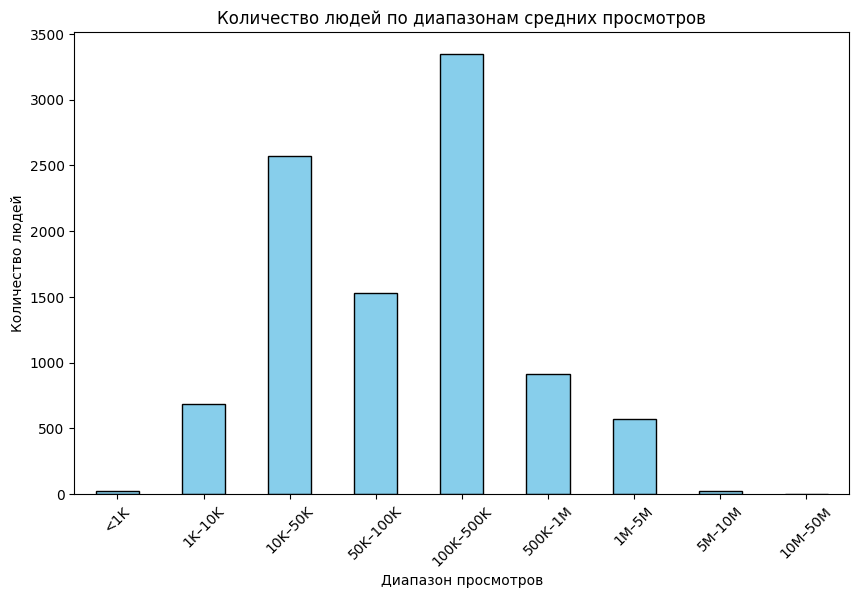

In [134]:
views_nonzero = df["average_views"][(df["average_views"] > 0) & (df["average_views"].notna()) & (df["video_counts"] > 10)]

bins = [0, 1_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000]
labels = ["<1K", "1K–10K", "10K–50K", "50K–100K", "100K–500K", "500K–1M", "1M–5M", "5M–10M", "10M–50M"]

views_grouped = pd.cut(views_nonzero, bins=bins, labels=labels, include_lowest=True)

counts = views_grouped.value_counts().sort_index()

for label, count in counts.items():
    print(f"{label}: {count} человек")

counts.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(10,6))
plt.title("Количество людей по диапазонам средних просмотров")
plt.xlabel("Диапазон просмотров")
plt.ylabel("Количество людей")
plt.xticks(rotation=45)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_33344\1124905729.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["Нет", "Да"])


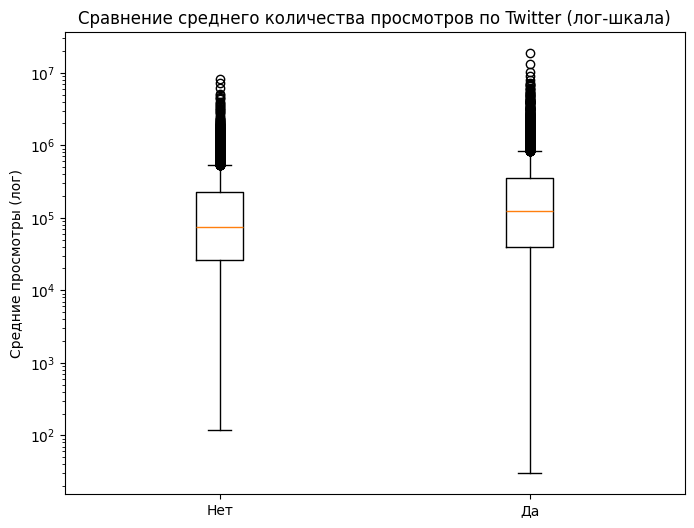

C:\Users\Acer\AppData\Local\Temp\ipykernel_33344\1124905729.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["Нет", "Да"])


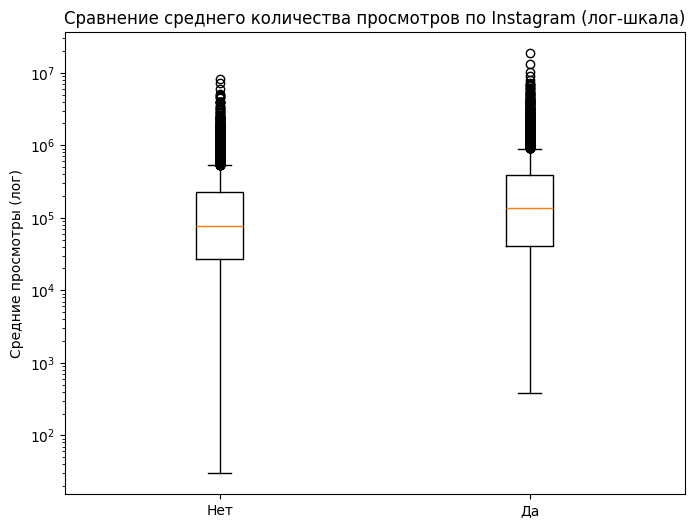

C:\Users\Acer\AppData\Local\Temp\ipykernel_33344\1124905729.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["Нет", "Да"])


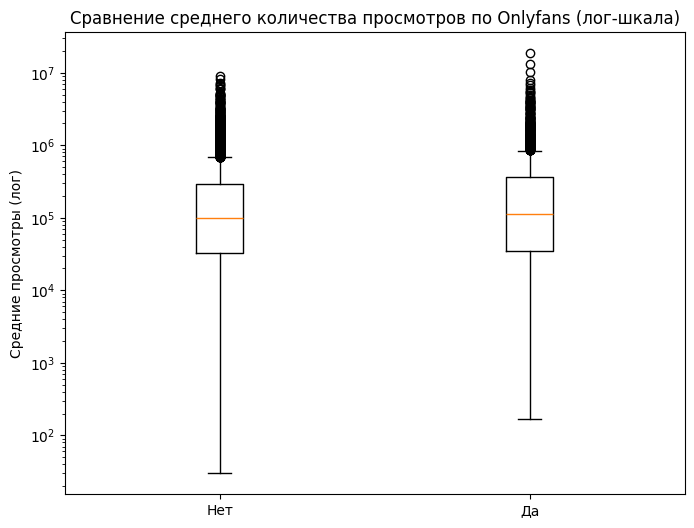

C:\Users\Acer\AppData\Local\Temp\ipykernel_33344\1124905729.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["Нет", "Да"])


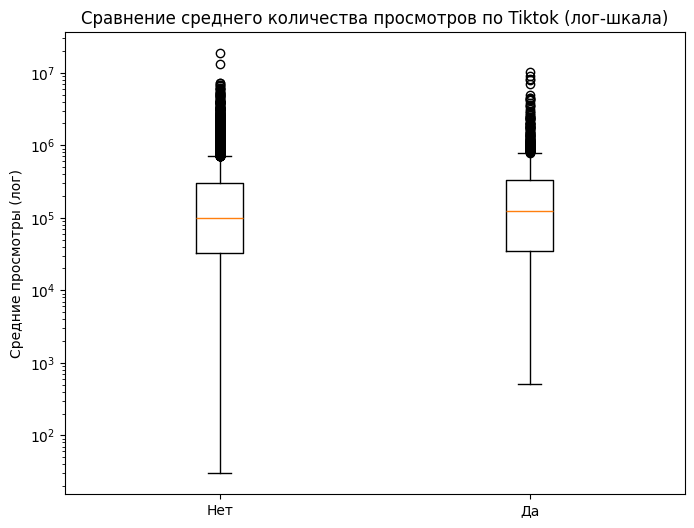

C:\Users\Acer\AppData\Local\Temp\ipykernel_33344\1124905729.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["Нет", "Да"])


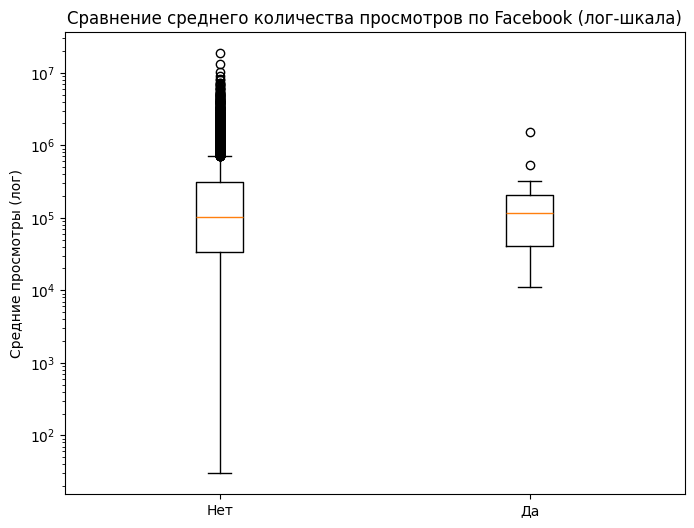

In [135]:
for i in ["twitter", "instagram", "onlyfans", "tiktok", "facebook"]:
    social = i + "_exists"
    
    df_plot = df[(df["average_views"] > 0) & (df["average_views"].notna()) & (df["video_counts"] > 10)][["average_views", social]]
    
    data_yes = df_plot[df_plot[social] == True]["average_views"]
    data_no = df_plot[df_plot[social] == False]["average_views"]
    
    plt.figure(figsize=(8,6))
    plt.boxplot([data_no, data_yes], labels=["Нет", "Да"])
    plt.yscale('log')
    plt.title(f"Сравнение среднего количества просмотров по {social.replace('_exists','').capitalize()} (лог-шкала)")
    plt.ylabel("Средние просмотры (лог)")
    plt.show()

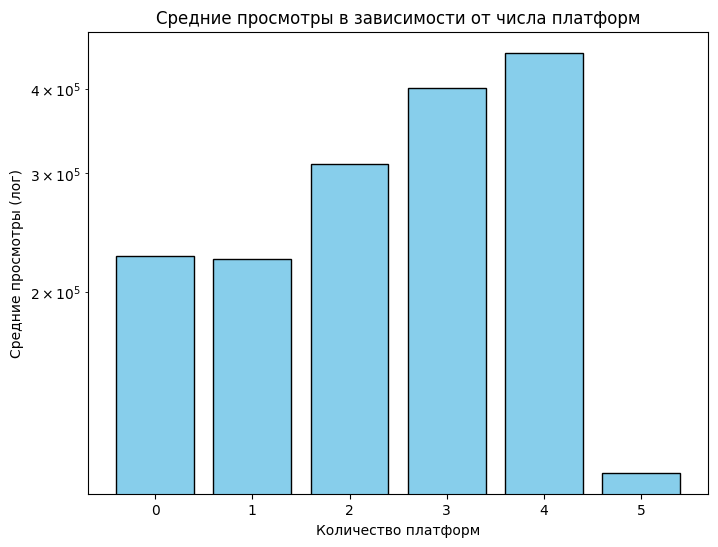

In [136]:
df_plot = df[df["video_counts"] > 10]

avg_views_by_platforms = df_plot.groupby("num_platforms")["average_views"].mean()

plt.figure(figsize=(8,6))
plt.bar(avg_views_by_platforms.index, avg_views_by_platforms.values, color="skyblue", edgecolor="black")
plt.yscale('log')
plt.xlabel("Количество платформ")
plt.ylabel("Средние просмотры (лог)")
plt.title("Средние просмотры в зависимости от числа платформ")
plt.xticks(avg_views_by_platforms.index)
plt.show()

C:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arrays\masked.py:691: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)


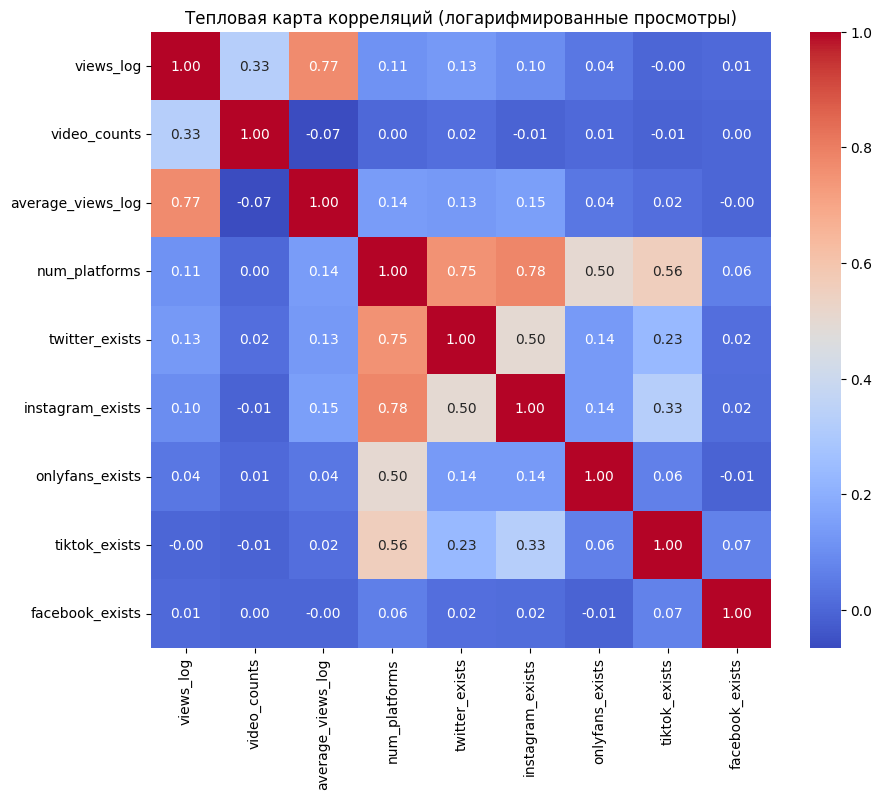

In [137]:
df_log = df.copy()
df_log["views_log"] = np.log10(df_log["views"])
df_log["average_views_log"] = np.log10(df_log["average_views"])

corr_columns_log = ["views_log", "video_counts", "average_views_log", "num_platforms",
                    "twitter_exists", "instagram_exists", "onlyfans_exists",
                    "tiktok_exists", "facebook_exists"]

corr_matrix_log = df_log[corr_columns_log].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_log, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Тепловая карта корреляций (логарифмированные просмотры)")
plt.show()

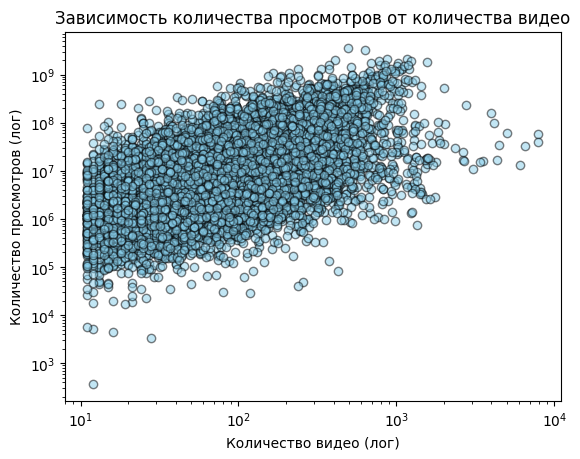

In [138]:
df_plot = df[df["video_counts"] > 10]

plt.scatter(df_plot["video_counts"], df_plot["views"], alpha=0.5, color="skyblue", edgecolor="black")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Количество видео (лог)")
plt.ylabel("Количество просмотров (лог)")
plt.title("Зависимость количества просмотров от количества видео")
plt.show()

In [145]:
def to_list(x):
    if isinstance(x, list):
        return x
    elif pd.isna(x):
        return []
    else:
        return [str(x)]

df["tags"] = df["tags"].apply(to_list)

In [152]:
df["tags"] = df["tags"].apply(lambda lst: [str(t).replace("[","").replace("]","").replace("'","").strip() for t in lst])

df_tags_exploded = df.explode("tags")

tag_counts = df_tags_exploded["tags"].value_counts()
print(tag_counts.head(10))

tags
anal         141
blowjob      135
amateur       65
big tits      28
milf          26
creampie      20
solo          15
latina        11
asmr           9
threesome      8
Name: count, dtype: int64


Топ-10 тегов по средним просмотрам
tags
petite               5485149.0
latin                5166667.0
cam                  4244032.0
camgirl              4050211.4
goth                 3783784.0
facial          2698449.857143
solo                 2658588.4
webcam          2615348.333333
pov                 2610808.25
creampie            2489942.95
asmr            2470742.111111
latina               2269758.7
amateur              2207248.6
oral            2083975.333333
hardcore             1945238.5
blowjob         1799521.180451
anal            1791825.165468
big cock             1680672.0
stepmom              1671733.0
cosplay         1652870.666667
big tits        1579686.925926
public               1565891.0
interracial     1540147.285714
asian           1536697.714286
gonzo                1502176.5
cumshot              1498669.0
threesome           1473551.75
indian               1426316.0
homemade             1426316.0
japanese             1392593.0
lesbian         1346774.666667

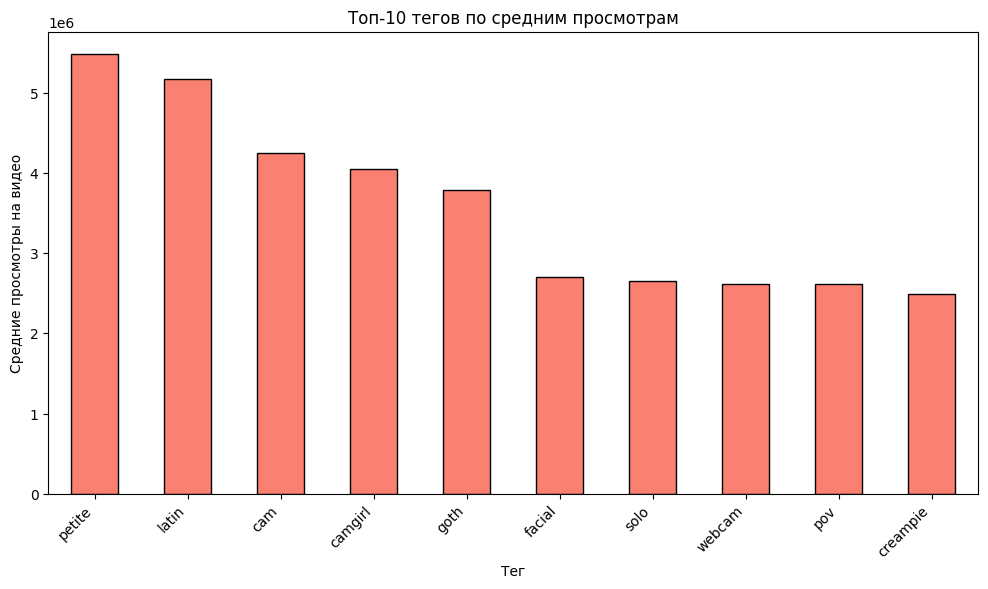

In [170]:
df_tags_exploded = df[df["video_counts"] > 10].explode("tags")

tag_counts = df_tags_exploded["tags"].value_counts()

avg_views_per_video_by_tag = df_tags_exploded.groupby("tags")["average_views"].mean().sort_values(ascending=False)

print("Топ-10 тегов по средним просмотрам")
print(avg_views_per_video_by_tag)

top_tags_video = avg_views_per_video_by_tag.head(10)
plt.figure(figsize=(12,6))
top_tags_video.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Топ-10 тегов по средним просмотрам")
plt.ylabel("Средние просмотры на видео")
plt.xlabel("Тег")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_33344\667934279.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_tag_counts = df_exploded.groupby(["views_cohort", "tags"]).size().unstack(fill_value=0)


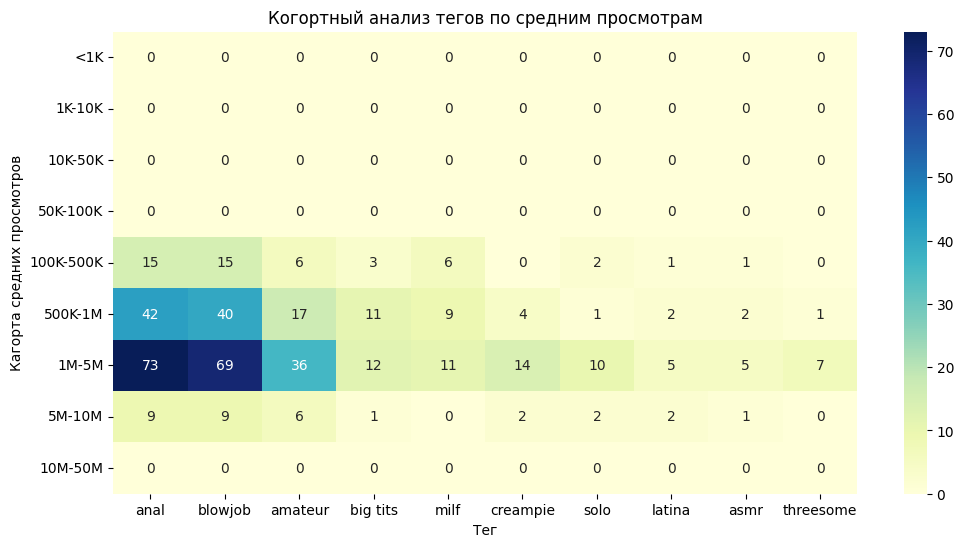

In [168]:
df_tags = df[df["video_counts"] > 10].copy()

bins = [0, 1_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000, 50_000_000]
labels = ["<1K", "1K-10K", "10K-50K", "50K-100K", "100K-500K", "500K-1M", "1M-5M", "5M-10M", "10M-50M"]
df_tags["views_cohort"] = pd.cut(df_tags["average_views"], bins=bins, labels=labels)

df_exploded = df_tags.explode("tags")

cohort_tag_counts = df_exploded.groupby(["views_cohort", "tags"]).size().unstack(fill_value=0)

top_tags_overall = df_exploded["tags"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.heatmap(cohort_tag_counts[top_tags_overall], annot=True, fmt="d", cmap="YlGnBu")
plt.title("Когортный анализ тегов по средним просмотрам")
plt.ylabel("Кагорта средних просмотров")
plt.xlabel("Тег")
plt.show()